Dataset link - https://www.kaggle.com/epa/fuel-economy.

The objective is to predict the fuel economy of a vehicle based on its characteristics.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline

We will first read the data in and look at some basic information.

In [2]:
# ignore warning about "Dtypes"
cars = pd.read_csv('/kaggle/input/fuel-economy/database.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,16,62,64,65,67,68,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# print out the number of rows and columns (dimensions)
cars.shape

(38113, 81)

In [4]:
# print the names of the columns
cars.columns

Index(['Vehicle ID', 'Year', 'Make', 'Model', 'Class', 'Drive', 'Transmission',
       'Transmission Descriptor', 'Engine Index', 'Engine Descriptor',
       'Engine Cylinders', 'Engine Displacement', 'Turbocharger',
       'Supercharger', 'Fuel Type', 'Fuel Type 1', 'Fuel Type 2',
       'City MPG (FT1)', 'Unrounded City MPG (FT1)', 'City MPG (FT2)',
       'Unrounded City MPG (FT2)', 'City Gasoline Consumption (CD)',
       'City Electricity Consumption', 'City Utility Factor',
       'Highway MPG (FT1)', 'Unrounded Highway MPG (FT1)', 'Highway MPG (FT2)',
       'Unrounded Highway MPG (FT2)', 'Highway Gasoline Consumption (CD)',
       'Highway Electricity Consumption', 'Highway Utility Factor',
       'Unadjusted City MPG (FT1)', 'Unadjusted Highway MPG (FT1)',
       'Unadjusted City MPG (FT2)', 'Unadjusted Highway MPG (FT2)',
       'Combined MPG (FT1)', 'Unrounded Combined MPG (FT1)',
       'Combined MPG (FT2)', 'Unrounded Combined MPG (FT2)',
       'Combined Electricity Consu

There are too many columns to analyse right now so I'm going to focus on a few. Columns related to MPG all say the same thing so I'll pick one. Also the columns that come after the MPG columns don't look very relevant so we'll skip them as well.

In [5]:
cars = cars[['Vehicle ID', 'Year', 'Make', 'Model', 'Class', 'Drive', 'Transmission',
            'Transmission Descriptor', 'Engine Index', 'Engine Descriptor',
           'Engine Cylinders', 'Engine Displacement', 'Turbocharger',
           'Supercharger', 'Fuel Type', 'Fuel Type 1',
            'Combined MPG (FT1)']]
cars.shape

(38113, 17)

The easiest way to get to know your data is to have a look at it in its raw form.

In [6]:
# print first 5 rows
cars.head()

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Combined MPG (FT1)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),6.0,2.5,NaN,NaN,Regular,Regular Gasoline,20
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,6.0,2.5,NaN,NaN,Regular,Regular Gasoline,20
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),4.0,2.0,NaN,NaN,Regular,Regular Gasoline,21
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,4.0,2.0,NaN,NaN,Regular,Regular Gasoline,21
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),4.0,2.5,NaN,NaN,Regular,Regular Gasoline,17


In [7]:
cars.tail()

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Combined MPG (FT1)
38108,37564,2017,Volvo,XC60 FWD,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),NaN,90,SIDI,4.0,2.0,T,NaN,Regular,Regular Gasoline,26
38109,37547,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,52,SIDI,4.0,2.0,T,S,Premium,Premium Gasoline,22
38110,37548,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,53,SIDI,4.0,2.0,T,NaN,Premium,Premium Gasoline,23
38111,37703,2017,Volvo,XC90 AWD PHEV,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,54,SIDI; PHEV,4.0,2.0,T,S,Premium and Electricity,Premium Gasoline,25
38112,37687,2017,Volvo,XC90 FWD,Standard Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),NaN,50,SIDI,4.0,2.0,T,NaN,Premium,Premium Gasoline,24


Some early observations about the data:
* Some columns have missing values (NaNs)
* There is a mix of numeric columns and categorical columns
* The MPG column is a integer value whereas Engine Cylinders and Engine Displacement are not. Doesn't make sense for Engine Cylinders to be a decimal value, will require further investigation
* Turbocharger and Supercharger only seem to have two values (missing or T/S)
* Possible duplication of vehicles (at least when looking at the columns of interest)

Next we go one step deeper and look at all the data and summaries of the values.

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle ID               38113 non-null  int64  
 1   Year                     38113 non-null  int64  
 2   Make                     38113 non-null  object 
 3   Model                    38113 non-null  object 
 4   Class                    38113 non-null  object 
 5   Drive                    36924 non-null  object 
 6   Transmission             38102 non-null  object 
 7   Transmission Descriptor  15045 non-null  object 
 8   Engine Index             38113 non-null  int64  
 9   Engine Descriptor        22693 non-null  object 
 10  Engine Cylinders         37977 non-null  float64
 11  Engine Displacement      37979 non-null  float64
 12  Turbocharger             5239 non-null   object 
 13  Supercharger             693 non-null    object 
 14  Fuel Type             

Here we see some columns have a considerable amount of missing values. We will need to consider what we do with these values later one. We also see here confirmed that all values in certain columns are of the same type.

In [9]:
cars.describe()

,Vehicle ID,Year,Engine Index,Engine Cylinders,Engine Displacement,Combined MPG (FT1)
count,38113.000000,38113.000000,38113.000000,37977.000000,37979.000000,38113.000000
mean,19170.638496,2000.194527,8799.389001,5.736656,3.317583,20.216068
std,11134.878665,10.464573,17781.058490,1.752254,1.361995,6.772655
min,1.000000,1984.000000,0.000000,2.000000,0.000000,7.000000
25%,9529.000000,1991.000000,0.000000,4.000000,2.200000,17.000000
50%,19058.000000,2001.000000,212.000000,6.000000,3.000000,19.000000
75%,28779.000000,2009.000000,4451.000000,6.000000,4.300000,23.000000
max,38542.000000,2017.000000,69102.000000,16.000000,8.400000,136.000000


Looking at summary values is more difficult. What we're looking for is anything out of the ordinary. We can safely ignore the *Vehicle ID* and *Engine Index* values as these don't mean anything. As for *Year* we can confirm that the data is for the period 1984 and 2017. 

**All prior information about the data is an assumption until confirmed by the data**

Looking at Engine Cylinders and MPG we may have an outlier that we have to deal with. Outliers are important because they tend to have an outsized effect on the model results. Finally, in the Engine Displacement column we see a minimum of zero which may point to an error.

### Duplicates

Duplicated data can be caused by errors during data entry or during data collection. For example, your SQL query may have included a join which resulted in duplicates. If all records were duplicated then it's not a huge problem other than that you have too much data and training your model may take extra time. However if only some records are duplicated their effect on the model results will be enlarged.

In this example it's not straightforward that we're dealing with duplicates. Take the first rows:

In [10]:
cars.head(2)

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Combined MPG (FT1)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),6.0,2.5,NaN,NaN,Regular,Regular Gasoline,20
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,6.0,2.5,NaN,NaN,Regular,Regular Gasoline,20


It's the same car except for the Engine Index/Descriptor but that doesn't seem to have an impact on the MPG. However we can't make that conclusion based on only one example. So we want to look at a subset of columns to judge duplicates.

In [11]:
id_columns = ['Make', 'Model', 'Class', 'Drive', 'Transmission',
            'Transmission Descriptor', 'Engine Cylinders', 'Engine Displacement', 'Turbocharger',
           'Supercharger', 'Fuel Type', 'Fuel Type 1',
            'Combined MPG (FT1)']
duplicates = cars.duplicated(subset=id_columns)

duplicates.sum()

18177

In [12]:
cars[duplicates].head()

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Combined MPG (FT1)
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,6.0,2.5,NaN,NaN,Regular,Regular Gasoline,20
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,4.0,2.0,NaN,NaN,Regular,Regular Gasoline,21
5,28426,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1880,(FFS) CA model,4.0,2.5,NaN,NaN,Regular,Regular Gasoline,17
7,28425,1984,AM General,FJ8c Post Office,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1881,(FFS) CA model,6.0,4.2,NaN,NaN,Regular,Regular Gasoline,13
9,28455,1984,American Motors Corporation,Eagle 4WD,Special Purpose Vehicle 4WD,4-Wheel or All-Wheel Drive,Automatic 3-Speed,NaN,1574,(FFS) CA model,6.0,4.2,NaN,NaN,Regular,Regular Gasoline,17


We can drop a few more columns from the identifier columns which will probably result in more duplicates but we'll leave it at that.

In [13]:
cars_dedup = cars.drop_duplicates(subset=id_columns)
cars_dedup.shape

(19936, 17)

### Categorical Values

We summarise categorical values by looking at their counts.

In [14]:
cars['Make'].value_counts()

Chevrolet                           3810
Ford                                3155
Dodge                               2531
GMC                                 2398
Toyota                              1937
                                    ... 
Goldacre                               1
Environmental Rsch and Devp Corp       1
Panoz Auto-Development                 1
Import Foreign Auto Sales Inc          1
Aurora Cars Ltd                        1
Name: Make, Length: 133, dtype: int64

The thing about _Make_ and _Model_ is that they are very specific, meaning there are a lot of possible values. This makes it hard for any algorithm to extract information that is generally applicable. Just think of the situation a new car maker appears, how should the algorithm deal with that if it hasn't seen it before. Instead it's better to look at variables that do generalize.

In [15]:
cars['Class'].value_counts()

Compact Cars                          5508
Subcompact Cars                       4872
Midsize Cars                          4395
Standard Pickup Trucks                2354
Sport Utility Vehicle - 4WD           2082
Large Cars                            1891
Two Seaters                           1886
Sport Utility Vehicle - 2WD           1627
Small Station Wagons                  1499
Special Purpose Vehicles              1455
Minicompact Cars                      1260
Standard Pickup Trucks 2WD            1177
Vans                                  1141
Standard Pickup Trucks 4WD             986
Midsize-Large Station Wagons           656
Special Purpose Vehicle 2WD            613
Small Pickup Trucks                    538
Small Sport Utility Vehicle 4WD        526
Midsize Station Wagons                 523
Vans, Cargo Type                       438
Small Pickup Trucks 2WD                436
Standard Sport Utility Vehicle 4WD     434
Small Sport Utility Vehicle 2WD        403
Minivan - 2

There's a reasonable amount of values here but any algorithm will still have trouble learning anything from the values that only have a handful of observations. Possible solutions are to either ignore or combine these values.

In [16]:
# remember Drive had a few missing values
cars['Drive'].value_counts(dropna=False)

Front-Wheel Drive             13351
Rear-Wheel Drive              13018
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                2121
NaN                            1189
4-Wheel Drive                  1103
2-Wheel Drive                   507
Part-time 4-Wheel Drive         176
Name: Drive, dtype: int64

Here where you would go back to the source and ask what exactly the difference is between these values. Perhaps some of these values can be combined.

Will come back to the missing values.

In [17]:
cars['Turbocharger'].value_counts(dropna=False)

NaN    32874
T       5239
Name: Turbocharger, dtype: int64

In [18]:
cars['Supercharger'].value_counts(dropna=False)

NaN    37420
S        693
Name: Supercharger, dtype: int64

When a column is majority missing values you have to wonder if it is of any use to include it. 

In [19]:
cars['Fuel Type'].value_counts()

Regular                        25258
Premium                        10133
Gasoline or E85                 1223
Diesel                          1014
Electricity                      133
Premium or E85                   122
Midgrade                          77
CNG                               60
Premium and Electricity           25
Gasoline or natural gas           20
Regular Gas and Electricity       20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: Fuel Type, dtype: int64

Do electric cars do mileage?

### Numerical values

We looked at summary statistics for the numerical values but we can go a little deeper by looking at the distribution of values.

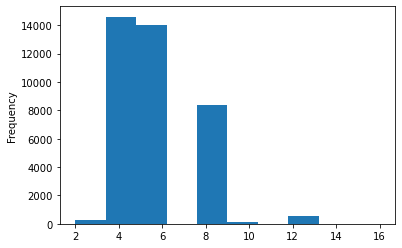

In [20]:
cars['Engine Cylinders'].plot.hist()

Most cars have 4 or 6 cylinders. We see a few that have 12 and 10 but the one that has 16 or 2 cylinders is odd.

In [21]:
cars[cars['Engine Cylinders']==16]

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Combined MPG (FT1)
24152,22661,2006,Bugatti,Veyron,Two Seaters,4-Wheel or All-Wheel Drive,Automatic (S6),3MODE,0,NaN,16.0,8.0,T,NaN,Premium,Premium Gasoline,10
26411,24169,2008,Bugatti,Veyron,Two Seaters,4-Wheel or All-Wheel Drive,Automatic (S6),3MODE,0,NaN,16.0,8.0,T,NaN,Premium,Premium Gasoline,10
28770,29250,2010,Bugatti,Veyron,Two Seaters,All-Wheel Drive,Automatic (S7),NaN,1,PR,16.0,8.0,T,NaN,Premium,Premium Gasoline,10
29876,30226,2011,Bugatti,Veyron,Two Seaters,All-Wheel Drive,Automatic (S7),NaN,61,NaN,16.0,8.0,T,NaN,Premium,Premium Gasoline,10
31003,31619,2012,Bugatti,Veyron,Two Seaters,All-Wheel Drive,Automatic (S7),NaN,85,NaN,16.0,8.0,T,NaN,Premium,Premium Gasoline,10
32163,32656,2013,Bugatti,Veyron,Two Seaters,All-Wheel Drive,Auto(AM-S7),NaN,88,NaN,16.0,8.0,T,NaN,Premium,Premium Gasoline,10
33333,33614,2014,Bugatti,Veyron,Two Seaters,All-Wheel Drive,Auto(AM-S7),NaN,27,NaN,16.0,8.0,T,NaN,Premium,Premium Gasoline,10
34565,34939,2015,Bugatti,Veyron,Two Seaters,All-Wheel Drive,Auto(AM-S7),NaN,60,NaN,16.0,8.0,T,NaN,Premium,Premium Gasoline,10


Ok maybe not that odd.

In [22]:
cars[cars['Engine Cylinders']==2].head()

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Combined MPG (FT1)
1212,26578,1984,Mazda,RX-7,Two Seaters,NaN,Automatic 4-Speed,NaN,56010,NaN,2.0,1.1,NaN,NaN,Regular,Regular Gasoline,17
1213,27697,1984,Mazda,RX-7,Two Seaters,NaN,Automatic 4-Speed,NaN,56016,CA model,2.0,1.1,NaN,NaN,Regular,Regular Gasoline,17
1214,26579,1984,Mazda,RX-7,Two Seaters,NaN,Manual 5-Speed,NaN,56010,NaN,2.0,1.1,NaN,NaN,Regular,Regular Gasoline,17
1215,26580,1984,Mazda,RX-7,Two Seaters,NaN,Manual 5-Speed,NaN,56011,(FFS),2.0,1.3,NaN,NaN,Regular,Regular Gasoline,17
1216,27698,1984,Mazda,RX-7,Two Seaters,NaN,Manual 5-Speed,NaN,56016,CA model,2.0,1.1,NaN,NaN,Regular,Regular Gasoline,17


In [23]:
cars[cars['Engine Cylinders']==2].shape

(55, 17)

In [24]:
cars[cars['Engine Cylinders']==2]['Make'].unique()

array(['Mazda', 'BMW'], dtype=object)

In [25]:
cars[cars['Engine Cylinders']==2].tail()

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Combined MPG (FT1)
30443,30614,2011,Mazda,RX-8,Subcompact Cars,Rear-Wheel Drive,Manual 6-Speed,NaN,14,NaN,2.0,1.3,NaN,NaN,Premium,Premium Gasoline,18
33304,35279,2014,BMW,i3 REX,Subcompact Cars,Rear-Wheel Drive,Automatic (A1),NaN,101,PHEV,2.0,0.6,NaN,NaN,Premium Gas or Electricity,Premium Gasoline,39
34522,36030,2015,BMW,i3 REX,Subcompact Cars,Rear-Wheel Drive,Automatic (A1),NaN,101,PHEV,2.0,0.6,NaN,NaN,Premium Gas or Electricity,Premium Gasoline,39
35769,37222,2016,BMW,i3 REX,Subcompact Cars,Rear-Wheel Drive,Automatic (A1),NaN,101,PHEV,2.0,0.6,NaN,NaN,Premium Gas or Electricity,Premium Gasoline,39
37015,38229,2017,BMW,i3 REX (94 Amp-hour battery),Subcompact Cars,Rear-Wheel Drive,Automatic (A1),NaN,103,PHEV; 94 Amp-hour battery,2.0,0.6,NaN,NaN,Premium Gas or Electricity,Premium Gasoline,35


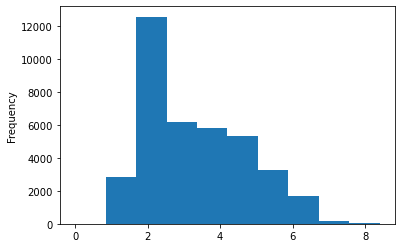

In [26]:
cars['Engine Displacement'].plot.hist()

So most cars are small cars so it makes sense the displacement distribution tends to the left. It is also not weird that there are some large cars in the dataset. I don't really know if a displacement of 8 is unusual. A displacement of 0 is however.

In [27]:
cars[cars['Engine Displacement']==0]

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Combined MPG (FT1)
36578,36023,2016,Mitsubishi,i-MiEV,Subcompact Cars,Rear-Wheel Drive,Automatic (A1),NaN,141,NaN,NaN,0.0,NaN,NaN,Electricity,Electricity,112


In [28]:
cars[cars['Engine Displacement']==8].head()

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Combined MPG (FT1)
10939,28912,1992,Dodge,Viper,Two Seaters,Rear-Wheel Drive,Manual 6-Speed,NaN,0,(GUZZLER) (FFS),10.0,8.0,NaN,NaN,Premium,Premium Gasoline,14
12029,28960,1993,Dodge,Viper,Two Seaters,Rear-Wheel Drive,Manual 6-Speed,NaN,0,(GUZZLER) (FFS),10.0,8.0,NaN,NaN,Premium,Premium Gasoline,15
13103,10627,1994,Dodge,Viper,Two Seaters,Rear-Wheel Drive,Manual 6-Speed,NaN,2625,(GUZZLER) (FFS),10.0,8.0,NaN,NaN,Premium,Premium Gasoline,15
14082,11589,1995,Dodge,Viper,Two Seaters,Rear-Wheel Drive,Manual 6-Speed,NaN,2911,(GUZZLER) (FFS),10.0,8.0,NaN,NaN,Premium,Premium Gasoline,14
14974,12517,1996,Dodge,Viper,Two Seaters,Rear-Wheel Drive,Manual 6-Speed,NaN,2710,(GUZZLER) (FFS),10.0,8.0,NaN,NaN,Premium,Premium Gasoline,14


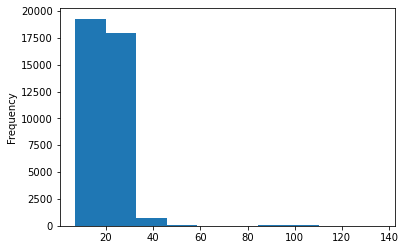

In [29]:
cars['Combined MPG (FT1)'].plot.hist()

In [30]:
cars[cars['Combined MPG (FT1)']>120]

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Combined MPG (FT1)
32998,33307,2013,Scion,iQ EV,Minicompact Cars,Front-Wheel Drive,Automatic (variable gear ratios),NaN,21,NaN,NaN,NaN,NaN,NaN,Electricity,Electricity,121
33303,35207,2014,BMW,i3 BEV,Subcompact Cars,Rear-Wheel Drive,Automatic (A1),NaN,100,NaN,NaN,NaN,NaN,NaN,Electricity,Electricity,124
34521,36016,2015,BMW,i3 BEV,Subcompact Cars,Rear-Wheel Drive,Automatic (A1),NaN,100,NaN,NaN,NaN,NaN,NaN,Electricity,Electricity,124
35768,37216,2016,BMW,i3 BEV,Subcompact Cars,Rear-Wheel Drive,Automatic (A1),NaN,100,NaN,NaN,NaN,NaN,NaN,Electricity,Electricity,124
37013,38000,2017,BMW,i3 BEV (60 Amp-hour battery),Subcompact Cars,Rear-Wheel Drive,Automatic (A1),NaN,100,NaN,NaN,NaN,NaN,NaN,Electricity,Electricity,124
37451,38431,2017,Hyundai,Ioniq Electric,Midsize Cars,Front-Wheel Drive,Automatic (A1),NaN,49,NaN,NaN,NaN,NaN,NaN,Electricity,Electricity,136


Makes sense these are all electric cars. It might be worth removing all electric cars because there is obviously no relationship between MPG and the other variables for this type of car (if that is what we're trying to predict).

### Missing Values

Dealing with missing values is necessary because ML algorithm don't know what to do with _NaN_ values. In most programming languages _NaN_ is a special value that is neither numeric nor character. So it requires manual intervention to make sure _NaN_ values are dealt with correctly.

There are a number of strategies we can apply here and they are dependent on what the source of the missing values is. There is various research available on this topic, referred to as missing value imputation, but we'll stick to some simple solutions.

#### Errors

When missing values are the result of errors, whether in the data gathering part or the data collection part (i.e. wrong query), I think it is best to ignore the records if possible.

In [31]:
not_missing_drive = cars['Drive'].notnull()
not_missing_drive.sum()

36924

#### Laziness

Sometimes a missing values implies the information is either not known or not applicable. In these case we simply make it explicit by providing a fill value. There are other methods of "filling" the gaps, see the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) for more information.

In [32]:
cars['Turbocharger'] = cars['Turbocharger'].fillna('No')
cars['Supercharger'] = cars['Supercharger'].fillna('No')

### Outliers

Outliers can too be caused by errors (e.g. misreading in measurement equipment) or they might not be representative of the relationships we're considering. In either case it's a matter of detecting them and removing them.

A simple way of detecting outliers is to consider the mean/median and add one or two standard deviations. Anything above these values can be considered an outlier. 

In [33]:
no_mpg_outlier = cars['Combined MPG (FT1)'] < (cars['Combined MPG (FT1)'].median() + cars['Combined MPG (FT1)'].std())
no_mpg_outlier.sum()

33313

In [34]:
no_electric_cars = cars['Fuel Type'] != 'Electricity'
cars_cleaned = cars[(~duplicates) & (not_missing_drive) & (no_mpg_outlier)]
cars_cleaned = cars_cleaned[['Class', 'Drive', 'Engine Cylinders', 
                             'Engine Displacement', 'Turbocharger','Supercharger', 
                             'Fuel Type', 'Combined MPG (FT1)']]

cars_cleaned.shape

(16815, 8)

## Relationship Analysis

The above is all to do with cleaning the data to make modeling easier. But before we move on to that stage we can still extract some more information from the dataset by looking at relationships between variables. The best way to do this is through visualisations.

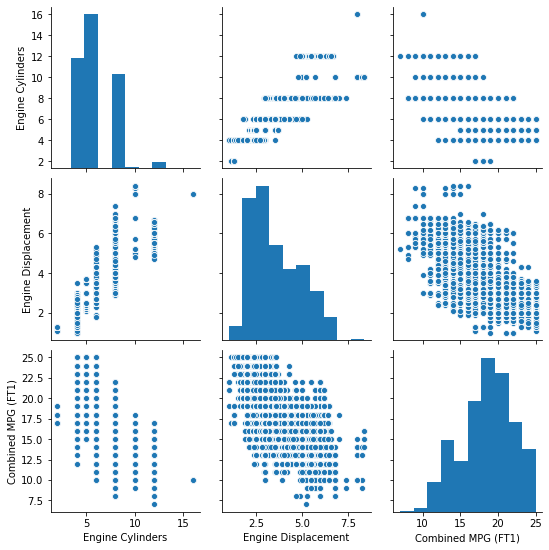

In [35]:
import seaborn as sns
sns.pairplot(cars_cleaned)

We can see a number of things here:
* There are no categorical values, pairplot only shows the numerical values
* Pairplot shows the distribution on the diagonal and scatterplots on the off-diagonals
* There is a relationship between engine displacement and number of cylinders which makes sense
* The number of cylinders is actually a categorical value
* There is relationship between displacement and mpg but there is also a lot of noise
* This relationship is even weaker between cylinders and mpg, possibly because it's not a numerical value

It is typical that midway through your analysis you uncover some insight that requires going back to the preprocessing/cleaning step.

### Boxplots

When it comes to relationship between categorical values and numerical values, boxplots are the way to go. They display the distribution of the numerical values per category.

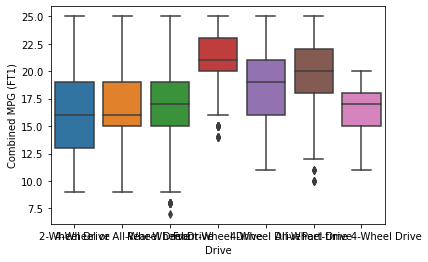

In [36]:
sns.boxplot(x='Drive', y='Combined MPG (FT1)', data=cars_cleaned)

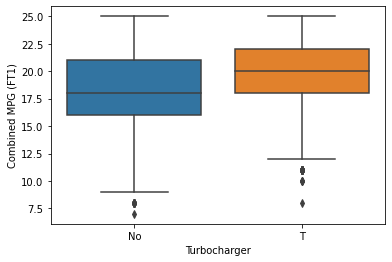

In [37]:
sns.boxplot(x='Turbocharger', y='Combined MPG (FT1)', data=cars_cleaned)

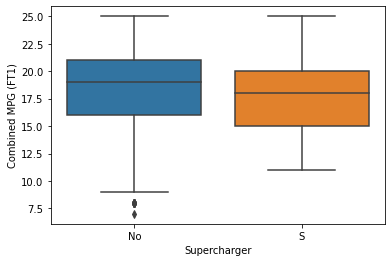

In [38]:
sns.boxplot(x='Supercharger', y='Combined MPG (FT1)', data=cars_cleaned)

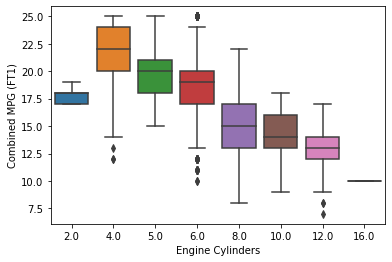

In [39]:
sns.boxplot(x='Engine Cylinders', y='Combined MPG (FT1)', data=cars_cleaned)

There are various incarnations of the boxplot (violinplot, swarmplot) that may give you more information but in this case that would be overkill. 